In [10]:
# Following this tutorial: https://qiskit-community.github.io/qiskit-algorithms/tutorials/06_grover.html

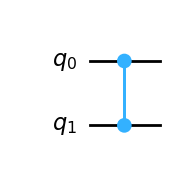

In [32]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ["11"]

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
oracle.draw(output="mpl")


In [33]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Creamos el circuito y el oracle
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# Aplicamos el circuito al estado |11⟩
initial_state = Statevector.from_label('11')
final_state = initial_state.evolve(oracle)

print(final_state)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


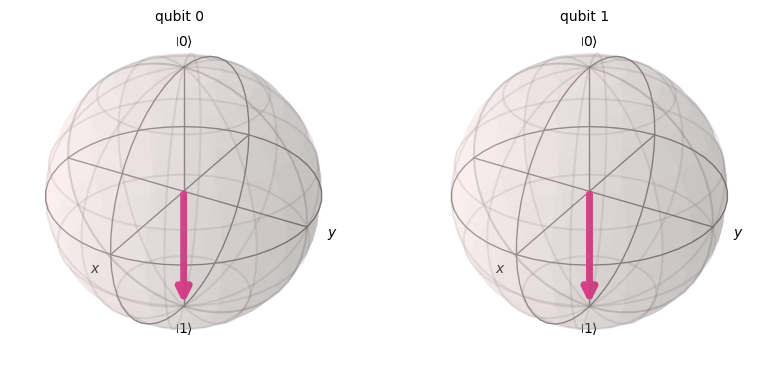

In [34]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(final_state)

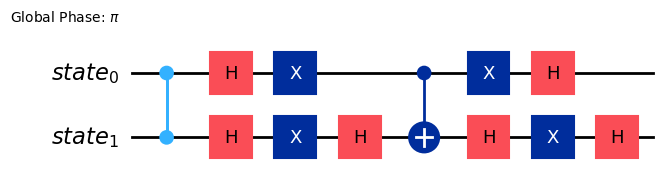

In [38]:
# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to appear in composition as a block
# so we have to decompose() the op to see it expanded into its component gates.)
problem.grover_operator.decompose().draw(output="mpl")

In [40]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler


grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


C:\Users\sabri\AppData\Local\Temp\ipykernel_22624\808285332.py:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


In [13]:
from qiskit.quantum_info import Statevector

oracle = Statevector.from_label("11")
problem = AmplificationProblem(oracle, is_good_state=["11"])

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


C:\Users\sabri\AppData\Local\Temp\ipykernel_22624\1906973721.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


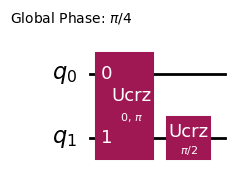

In [14]:
problem.grover_operator.oracle.decompose().draw(output="mpl")

In [15]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

# `Oracle` (`PhaseOracle`) as the `oracle` argument
expression = "(a & b)"
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle)
    display(problem.grover_operator.oracle.decompose().draw(output="mpl"))
except MissingOptionalLibraryError as ex:
    print(ex)

"The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."


state preparation circuit:


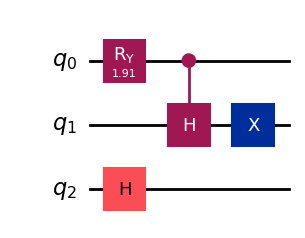

In [16]:
import numpy as np

# Specifying `state_preparation`
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0, 1)
state_preparation.x(1)
state_preparation.h(2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(
    oracle, state_preparation=state_preparation, is_good_state=["110", "111"]
)

# state_preparation
print("state preparation circuit:")
problem.grover_operator.state_preparation.draw(output="mpl")

In [17]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Success!
Top measurement: 111


C:\Users\sabri\AppData\Local\Temp\ipykernel_22624\336064450.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


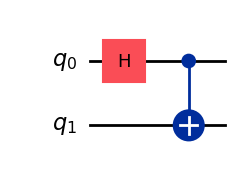